In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.anova import AnovaRM
from scipy import stats
%config InlineBackend.figure_format = 'svg'

In [154]:
#calculate the means

In [155]:
pf=pd.read_csv("participant_data.csv")
pf

,participant,slider.response,scale,label,item_type,item_no,correct_option,AC_correct,AC_no_correct,AC_outcome,literacy,ageResp.text,genderResp1.response,edu_slider.response,total_duration
0,1,0.914861,trunc,blank,﻿E,24,NaN,NaN,6,PASS,24,21,Man,Secondary education (e.g. GED/GCSE),849.1317
1,1,0.388545,extend,label,﻿E,45,NaN,NaN,6,PASS,24,21,Man,Secondary education (e.g. GED/GCSE),849.1317
2,1,0.751806,trunc,blank,﻿E,8,NaN,NaN,6,PASS,24,21,Man,Secondary education (e.g. GED/GCSE),849.1317
3,1,0.985036,trunc,label,﻿E,37,NaN,NaN,6,PASS,24,21,Man,Secondary education (e.g. GED/GCSE),849.1317
4,1,0.776574,trunc,label,﻿E,46,NaN,NaN,6,PASS,24,21,Man,Secondary education (e.g. GED/GCSE),849.1317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8905,165,0.687037,extend,label,﻿E,34,NaN,NaN,6,PASS,24,24,Man,High school diploma/A-levels,410.0505
8906,165,0.994444,trunc,blank,﻿E,28,NaN,NaN,6,PASS,24,24,Man,High school diploma/A-levels,410.0505
8907,165,0.755556,extend,blank,﻿E,48,NaN,NaN,6,PASS,24,24,Man,High school diploma/A-levels,410.0505
8908,165,0.703704,extend,blank,﻿E,39,NaN,NaN,6,PASS,24,24,Man,High school diploma/A-levels,410.0505


In [156]:
pf.drop_duplicates('participant',keep = 'last', inplace = True)
pf

,participant,slider.response,scale,label,item_type,item_no,correct_option,AC_correct,AC_no_correct,AC_outcome,literacy,ageResp.text,genderResp1.response,edu_slider.response,total_duration
53,1,0.516512,extend,label,﻿E,14,NaN,NaN,6,PASS,24,21,Man,Secondary education (e.g. GED/GCSE),849.1317
107,2,0.988889,trunc,blank,﻿E,48,NaN,NaN,6,PASS,21,20,Man,High school diploma/A-levels,307.7220
161,3,0.794213,trunc,label,﻿E,5,NaN,NaN,2,FAIL,30,24,Man,Undergraduate degree (BA/BSc/other),343.4783
215,4,0.540741,extend,blank,﻿E,23,NaN,NaN,3,FAIL,15,24,Woman,Undergraduate degree (BA/BSc/other),406.2168
269,5,0.903704,trunc,label,﻿E,37,NaN,NaN,5,PASS,20,29,Woman,Undergraduate degree (BA/BSc/other),402.9847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8693,161,0.537037,extend,label,﻿E,42,NaN,NaN,6,PASS,26,20,Woman,High school diploma/A-levels,1411.5230
8747,162,0.515625,extend,blank,﻿E,30,NaN,NaN,2,FAIL,26,25,Man,Graduate degree (MA/MSc/MPhil/other),277.8798
8801,163,0.583333,extend,label,﻿E,40,NaN,NaN,2,FAIL,26,32,Man,Secondary education (e.g. GED/GCSE),1020.5610
8855,164,0.960938,trunc,label,﻿E,48,NaN,NaN,6,PASS,21,19,Woman,High school diploma/A-levels,1772.6496


In [157]:
print(np.mean(pf["literacy"]))
print(np.std(pf["literacy"]))
print(np.mean(pf["ageResp.text"]))
print(np.std(pf["ageResp.text"]))
print(np.mean(pf["total_duration"])/60)
print(np.std(pf["total_duration"]/60))
print(max(pf["literacy"]))

21.812121212121212
4.4783490989397325
31.806060606060605
10.113235833630597
12.559857555555563
6.19539946388191
30


In [158]:
#data visulisation

In [160]:
df=pd.read_csv("participant_data.csv")
experimental=df.loc[df['item_no'] <49]
print(experimental)
experimental1=experimental.loc[experimental['label']=='label']
experimental2=experimental.loc[experimental['label']=='blank']

      participant  slider.response   scale  label item_type  item_no  \
0               1         0.914861   trunc  blank        ﻿E       24   
1               1         0.388545  extend  label        ﻿E       45   
2               1         0.751806   trunc  blank        ﻿E        8   
3               1         0.985036   trunc  label        ﻿E       37   
4               1         0.776574   trunc  label        ﻿E       46   
...           ...              ...     ...    ...       ...      ...   
8905          165         0.687037  extend  label        ﻿E       34   
8906          165         0.994444   trunc  blank        ﻿E       28   
8907          165         0.755556  extend  blank        ﻿E       48   
8908          165         0.703704  extend  blank        ﻿E       39   
8909          165         0.683333  extend  label        ﻿E       41   

      correct_option AC_correct  AC_no_correct AC_outcome  literacy  \
0                NaN        NaN              6       PASS       

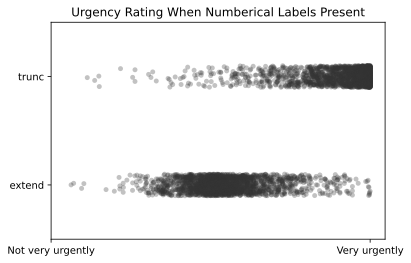

In [175]:
ax = sns.stripplot(x="slider.response", y="scale", data=experimental1,color=".2",order=["trunc","extend"],alpha=0.3)
#ax = sns.violinplot(x="slider.response", y="scale", data=experimental1,order=["trunc","extend"],inner=None, color=".9")
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Urgency Rating When Numberical Labels Present")
ax.set_xticks([0 ,1])
ax.set_xticklabels(["Not very urgently","Very urgently"])
plt.savefig("test1.png", dpi=500,bbox_inches='tight')

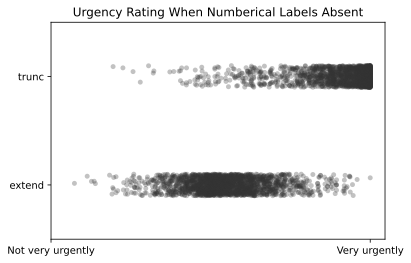

In [176]:
ax = sns.stripplot(x="slider.response", y="scale", data=experimental2,color=".2",order=["trunc","extend"],alpha=0.3)
#ax.set_xlabel("   Not Very Urgent                                                                     Very Urgent")
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Urgency Rating When Numberical Labels Absent")
ax.set_xticks([0 ,1])
ax.set_xticklabels(["Not very urgently","Very urgently"])
#ax.set_axis_off()
plt.savefig("test2.png", dpi=500,bbox_inches='tight')

In [163]:
grouped_data=experimental.groupby(['scale','label'])
group_means=grouped_data['slider.response'].mean()
group_errors=grouped_data['slider.response'].std()
group_means

scale   label
extend  blank    0.548309
        label    0.550007
trunc   blank    0.911026
        label    0.902657
Name: slider.response, dtype: float64

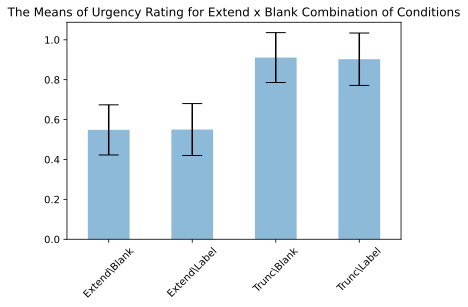

<Figure size 432x288 with 0 Axes>

In [177]:
group_means.plot(kind="bar", yerr=group_errors, alpha=0.5, capsize=10)
plt.title('The Means of Urgency Rating for Extend x Blank Combination of Conditions')
plt.xticks([0, 1, 2, 3], ['Extend\Blank', 'Extend\Label', 'Trunc\Blank', 'Trunc\Label'], rotation=45)
plt.xlabel("")
plt.show()
plt.savefig("test3.png", dpi=500,bbox_inches='tight')

In [178]:
group_means = grouped_data.mean()
pd.DataFrame(group_means)

participant  slider.response    item_no  correct_option  \
scale  label                                                            
extend blank         83.0         0.548309  24.494949             NaN   
       label         83.0         0.550007  24.505051             NaN   
trunc  blank         83.0         0.911026  24.492929             NaN   
       label         83.0         0.902657  24.507071             NaN   

              AC_no_correct   literacy  ageResp.text  total_duration  
scale  label                                                          
extend blank       4.436364  21.812121     31.806061      753.591453  
       label       4.436364  21.812121     31.806061      753.591453  
trunc  blank       4.436364  21.812121     31.806061      753.591453  
       label       4.436364  21.812121     31.806061      753.591453

In [179]:
data_to_plot = pd.DataFrame(group_means).reset_index()
data_to_plot

,scale,label,participant,slider.response,item_no,correct_option,AC_no_correct,literacy,ageResp.text,total_duration
0,extend,blank,83.0,0.548309,24.494949,NaN,4.436364,21.812121,31.806061,753.591453
1,extend,label,83.0,0.550007,24.505051,NaN,4.436364,21.812121,31.806061,753.591453
2,trunc,blank,83.0,0.911026,24.492929,NaN,4.436364,21.812121,31.806061,753.591453
3,trunc,label,83.0,0.902657,24.507071,NaN,4.436364,21.812121,31.806061,753.591453


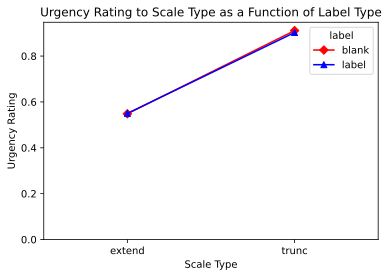

In [184]:
my_interaction_plot = interaction_plot(x=data_to_plot['scale'], trace=data_to_plot['label'], 
                                       response=data_to_plot['slider.response'], colors=['red', 'blue'], 
                                       markers=['D', '^'])
plt.xlabel('Scale Type')
plt.ylabel('Urgency Rating')
plt.title('Urgency Rating to Scale Type as a Function of Label Type')
plt.ylim(0)
plt.margins(.5, 1)
plt.savefig("test4.png", dpi=500,bbox_inches='tight')

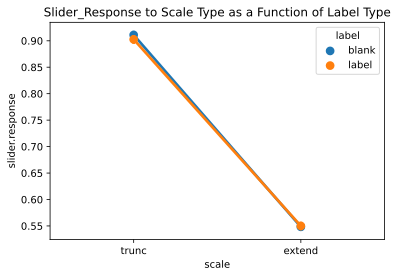

In [181]:
ax = sns.pointplot(x="scale", y="slider.response", hue="label",
                    data=experimental)
plt.title('Urgency Rating to Scale Type as a Function of Label Type')
plt.savefig("test5.png", dpi=500,bbox_inches='tight')

In [182]:
experimental=experimental[['participant','scale','label','slider.response']]
experimental

,participant,scale,label,slider.response
0,1,trunc,blank,0.914861
1,1,extend,label,0.388545
2,1,trunc,blank,0.751806
3,1,trunc,label,0.985036
4,1,trunc,label,0.776574
...,...,...,...,...
8905,165,extend,label,0.687037
8906,165,trunc,blank,0.994444
8907,165,extend,blank,0.755556
8908,165,extend,blank,0.703704


In [125]:
factorial_model = AnovaRM(data=experimental, depvar='slider.response', within=['scale','label'], subject='participant',aggregate_func='mean').fit()
print(factorial_model)

                   Anova
             F Value  Num DF  Den DF  Pr > F
--------------------------------------------
scale       1158.2456 1.0000 164.0000 0.0000
label          1.8531 1.0000 164.0000 0.1753
scale:label    3.9274 1.0000 164.0000 0.0492



In [126]:
res = pg.rm_anova(dv='slider.response', within=['scale', 'label'], subject='participant', 
                  data=experimental, detailed=True)
res.round(5)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,scale,21.10968,1,164,21.10968,1158.24558,0.00000,0.00000,0.77989,1.0
1,label,0.00184,1,164,0.00184,1.85311,0.17529,0.17529,0.00031,1.0
2,scale * label,0.00418,1,164,0.00418,3.92738,0.04918,0.04918,0.00070,1.0


In [127]:
index = (experimental['scale']=='trunc') & (experimental['label']=='blank')
TB = experimental[index]['slider.response'] 

index = (experimental['scale']=='trunc') & (experimental['label']=='label')
TL = experimental[index]['slider.response']

stats.ttest_rel(TB, TL)
#The difference exist when scalse is trunc

Ttest_relResult(statistic=3.023728911735249, pvalue=0.0025288832262657696)

In [128]:
index = (experimental['scale']=='extend') & (experimental['label']=='blank')
TB = experimental[index]['slider.response'] 

index = (experimental['scale']=='extend') & (experimental['label']=='label')
TL = experimental[index]['slider.response']

stats.ttest_rel(TB, TL)
#the difference not exist when scale is extend

Ttest_relResult(statistic=-0.5735131459564331, pvalue=0.5663624659244602)

In [133]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
mydf = experimental[experimental.scale == 'trunc']

# comparing the height between each diet, using 95% confidence interval 
multiComp = MultiComparison(mydf['slider.response'], mydf['label'])
tukeyres = multiComp.tukeyhsd(alpha = 0.05)

print(tukeyres)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 blank  label  -0.0084 0.0401 -0.0164 -0.0004   True
----------------------------------------------------


In [134]:
mydf = experimental[experimental.scale == 'extend']

# comparing the height between each diet, using 95% confidence interval 
multiComp = MultiComparison(mydf['slider.response'], mydf['label'])
tukeyres = multiComp.tukeyhsd(alpha = 0.05)

print(tukeyres)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
 blank  label   0.0017 0.6763 -0.0063 0.0097  False
---------------------------------------------------


In [135]:
##Finished data analysis for all the participants 

In [136]:
pf=pd.read_csv("participant_data.csv")
pf

,participant,slider.response,scale,label,item_type,item_no,correct_option,AC_correct,AC_no_correct,AC_outcome,literacy,ageResp.text,genderResp1.response,edu_slider.response,total_duration
0,1,0.914861,trunc,blank,﻿E,24,NaN,NaN,6,PASS,24,21,Man,Secondary education (e.g. GED/GCSE),849.1317
1,1,0.388545,extend,label,﻿E,45,NaN,NaN,6,PASS,24,21,Man,Secondary education (e.g. GED/GCSE),849.1317
2,1,0.751806,trunc,blank,﻿E,8,NaN,NaN,6,PASS,24,21,Man,Secondary education (e.g. GED/GCSE),849.1317
3,1,0.985036,trunc,label,﻿E,37,NaN,NaN,6,PASS,24,21,Man,Secondary education (e.g. GED/GCSE),849.1317
4,1,0.776574,trunc,label,﻿E,46,NaN,NaN,6,PASS,24,21,Man,Secondary education (e.g. GED/GCSE),849.1317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8905,165,0.687037,extend,label,﻿E,34,NaN,NaN,6,PASS,24,24,Man,High school diploma/A-levels,410.0505
8906,165,0.994444,trunc,blank,﻿E,28,NaN,NaN,6,PASS,24,24,Man,High school diploma/A-levels,410.0505
8907,165,0.755556,extend,blank,﻿E,48,NaN,NaN,6,PASS,24,24,Man,High school diploma/A-levels,410.0505
8908,165,0.703704,extend,blank,﻿E,39,NaN,NaN,6,PASS,24,24,Man,High school diploma/A-levels,410.0505


In [137]:
pf=pf.loc[pf['AC_no_correct']>=5]
pf

,participant,slider.response,scale,label,item_type,item_no,correct_option,AC_correct,AC_no_correct,AC_outcome,literacy,ageResp.text,genderResp1.response,edu_slider.response,total_duration
0,1,0.914861,trunc,blank,﻿E,24,NaN,NaN,6,PASS,24,21,Man,Secondary education (e.g. GED/GCSE),849.1317
1,1,0.388545,extend,label,﻿E,45,NaN,NaN,6,PASS,24,21,Man,Secondary education (e.g. GED/GCSE),849.1317
2,1,0.751806,trunc,blank,﻿E,8,NaN,NaN,6,PASS,24,21,Man,Secondary education (e.g. GED/GCSE),849.1317
3,1,0.985036,trunc,label,﻿E,37,NaN,NaN,6,PASS,24,21,Man,Secondary education (e.g. GED/GCSE),849.1317
4,1,0.776574,trunc,label,﻿E,46,NaN,NaN,6,PASS,24,21,Man,Secondary education (e.g. GED/GCSE),849.1317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8905,165,0.687037,extend,label,﻿E,34,NaN,NaN,6,PASS,24,24,Man,High school diploma/A-levels,410.0505
8906,165,0.994444,trunc,blank,﻿E,28,NaN,NaN,6,PASS,24,24,Man,High school diploma/A-levels,410.0505
8907,165,0.755556,extend,blank,﻿E,48,NaN,NaN,6,PASS,24,24,Man,High school diploma/A-levels,410.0505
8908,165,0.703704,extend,blank,﻿E,39,NaN,NaN,6,PASS,24,24,Man,High school diploma/A-levels,410.0505


In [138]:
print(np.mean(pf["literacy"]))
print(np.std(pf["literacy"]))
print(np.mean(pf["ageResp.text"]))
print(np.std(pf["ageResp.text"]))
print(np.mean(pf["total_duration"])/60)
print(np.std(pf["total_duration"]/60))
print(max(pf["literacy"]))

21.63
4.531346378285349
30.79
8.778718585306208
13.571855066666377
6.2397748880965365
30


In [139]:
experimental=pf.loc[pf['item_no'] <49]
print(experimental)

      participant  slider.response   scale  label item_type  item_no  \
0               1         0.914861   trunc  blank        ﻿E       24   
1               1         0.388545  extend  label        ﻿E       45   
2               1         0.751806   trunc  blank        ﻿E        8   
3               1         0.985036   trunc  label        ﻿E       37   
4               1         0.776574   trunc  label        ﻿E       46   
...           ...              ...     ...    ...       ...      ...   
8905          165         0.687037  extend  label        ﻿E       34   
8906          165         0.994444   trunc  blank        ﻿E       28   
8907          165         0.755556  extend  blank        ﻿E       48   
8908          165         0.703704  extend  blank        ﻿E       39   
8909          165         0.683333  extend  label        ﻿E       41   

      correct_option AC_correct  AC_no_correct AC_outcome  literacy  \
0                NaN        NaN              6       PASS       

In [140]:
experimental1=experimental.loc[experimental['label']=='label']
experimental2=experimental.loc[experimental['label']=='blank']

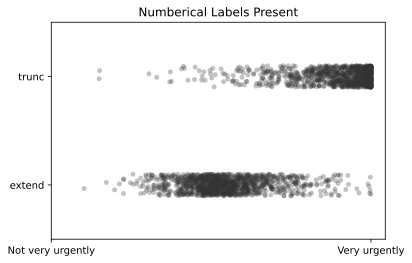

In [141]:
ax = sns.stripplot(x="slider.response", y="scale", data=experimental1,color=".2",order=["trunc","extend"],alpha=0.3)
#ax = sns.violinplot(x="slider.response", y="scale", data=experimental1,order=["trunc","extend"],inner=None, color=".9")
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Urgency Rating When Numberical Labels Present")
ax.set_xticks([0 ,1])
ax.set_xticklabels(["Not very urgently","Very urgently"])
plt.savefig("test1_1.png", dpi=500,bbox_inches='tight')

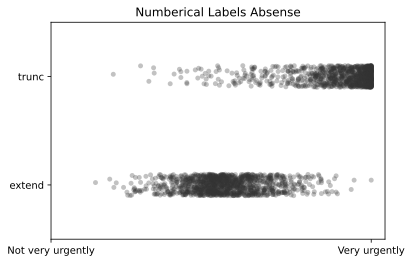

In [142]:
ax = sns.stripplot(x="slider.response", y="scale", data=experimental2,color=".2",order=["trunc","extend"],alpha=0.3)
#ax.set_xlabel("   Not Very Urgent                                                                     Very Urgent")
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Urgency Rating When Numberical Labels Absense")
ax.set_xticks([0 ,1])
ax.set_xticklabels(["Not very urgently","Very urgently"])
#ax.set_axis_off()
plt.savefig("test2_1.png", dpi=500,bbox_inches='tight')

In [143]:
grouped_data=experimental.groupby(['scale','label'])
group_means=grouped_data['slider.response'].mean()
group_errors=grouped_data['slider.response'].std()
group_means

scale   label
extend  blank    0.544509
        label    0.547330
trunc   blank    0.910465
        label    0.904257
Name: slider.response, dtype: float64

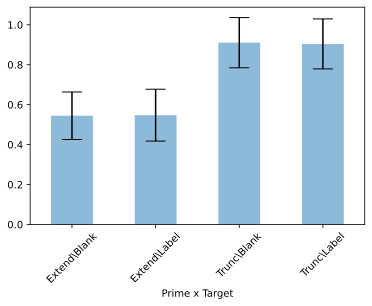

<Figure size 432x288 with 0 Axes>

In [144]:
group_means.plot(kind="bar", yerr=group_errors, alpha=0.5, capsize=10)
plt.xlabel('The Means of Urgency Rating for Extend x Blank Combination of Conditions')
plt.xticks([0, 1, 2, 3], ['Extend\Blank', 'Extend\Label', 'Trunc\Blank', 'Trunc\Label'], rotation=45)
plt.show()
plt.savefig("test3_1.png", dpi=500,bbox_inches='tight')

In [145]:
group_means = grouped_data.mean()
pd.DataFrame(group_means)
data_to_plot = pd.DataFrame(group_means).reset_index()
data_to_plot

,scale,label,participant,slider.response,item_no,correct_option,AC_no_correct,literacy,ageResp.text,total_duration
0,extend,blank,86.6,0.544509,24.5,NaN,5.79,21.63,30.79,814.311304
1,extend,label,86.6,0.547330,24.5,NaN,5.79,21.63,30.79,814.311304
2,trunc,blank,86.6,0.910465,24.5,NaN,5.79,21.63,30.79,814.311304
3,trunc,label,86.6,0.904257,24.5,NaN,5.79,21.63,30.79,814.311304


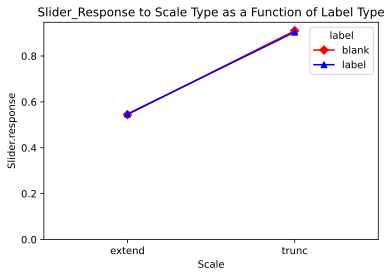

In [146]:
my_interaction_plot = interaction_plot(x=data_to_plot['scale'], trace=data_to_plot['label'], 
                                       response=data_to_plot['slider.response'], colors=['red', 'blue'], 
                                       markers=['D', '^'])
plt.xlabel('Scale Type')
plt.ylabel('Urgency Rating')
plt.title('Urgency Rating to Scale Type as a Function of Label Type')
plt.ylim(0)
plt.margins(.5, 1)
plt.savefig("test4_1.png", dpi=500,bbox_inches='tight')

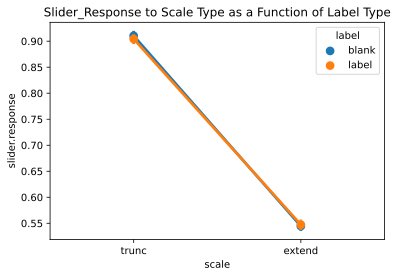

In [147]:
ax = sns.pointplot(x="scale", y="slider.response", hue="label",
                    data=experimental)
plt.title('Slider_Response to Scale Type as a Function of Label Type')
plt.savefig("test5_1.png", dpi=500,bbox_inches='tight')

In [148]:
factorial_model = AnovaRM(data=experimental, depvar='slider.response', within=['scale','label'], subject='participant',aggregate_func='mean').fit()
print(factorial_model)

                  Anova
            F Value  Num DF  Den DF Pr > F
------------------------------------------
scale       859.3540 1.0000 99.0000 0.0000
label         0.2684 1.0000 99.0000 0.6056
scale:label   1.7322 1.0000 99.0000 0.1912



In [149]:
res = pg.rm_anova(dv='slider.response', within=['scale', 'label'], subject='participant', 
                  data=experimental, detailed=True)
res.round(5)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,scale,13.06399,1,99,13.06399,859.35402,0.00000,0.00000,0.79602,1.0
1,label,0.00029,1,99,0.00029,0.26841,0.60555,0.60555,0.00009,1.0
2,scale * label,0.00204,1,99,0.00204,1.73219,0.19117,0.19117,0.00061,1.0
